# Droplet spreading over a flat surface against static contact angle $\theta_e$ -         Dyanamics validation study


# Squalane

# Convergence study

/home/asghar/ma11kuba/publications/article-2022-interIsoFoam-wetting-benchmark/rebuttal2/Reproducibility_badge/notebooks/PartialWettingDynamics
['/home/asghar/ma11kuba/publications/article-2022-interIsoFoam-wetting-benchmark/rebuttal2/Reproducibility_badge/notebooks/PartialWettingDynamics/ConvergenceStudy/test_00000_case/postProcessing/wettedArea.csv', '/home/asghar/ma11kuba/publications/article-2022-interIsoFoam-wetting-benchmark/rebuttal2/Reproducibility_badge/notebooks/PartialWettingDynamics/ConvergenceStudy/test_00001_case/postProcessing/wettedArea.csv', '/home/asghar/ma11kuba/publications/article-2022-interIsoFoam-wetting-benchmark/rebuttal2/Reproducibility_badge/notebooks/PartialWettingDynamics/ConvergenceStudy/test_00002_case/postProcessing/wettedArea.csv']


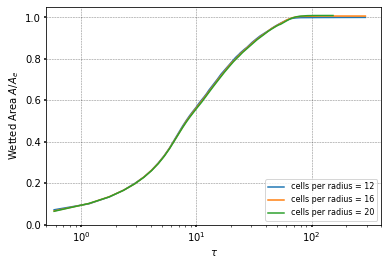

In [1]:
#Wetted Area 
#Loading the necessary files
import pandas as pd
import numpy as np
from vtk import vtkStructuredPointsReader
from vtk.util import numpy_support as VN
import csv
import sys
# for radians
import math
import os
import matplotlib.pyplot as plt
import re
import itertools
from matplotlib import rcParams
pi = np.pi
sin = np.sin
cos = np.cos
#plt.figure(figsize=(4, 3))
rcParams["figure.dpi"] = 600
fontSize = 10

# Append the path to the modules directory
print(os.getcwd())
sys.path.append(os.path.join(os.getcwd(), '../modules'))

# Import the required functions from the "flat_spreading_funcs" module
from dynamics import Funcs
wettedAreaFileNames = Funcs.fileStructure('ConvergenceStudy','wettedArea.csv', 'test_')
print(wettedAreaFileNames)
plotLabels = ['cells per radius = 12','cells per radius = 16','cells per radius = 20']

#Experimental parameters
# Given constants from Lavi and Marmur study for squalance drolet
K = 0.471
n = 0.699
R_0 = 1e-3  # droplet radius in meters
#V2 = 4/3*np.pi*R_0**3
theta = math.radians(41)
#Liquid properties
sigma = 32e-3
mu = 34e-3
# Calculating the volume of the sphere
V = 4.1887902047863908955e-09 # given by volume fractions
factor = 4.49 # A_f/V^(2/3)

# Time range
t = np.linspace(0.0001, 1, 5000)
tau_0 = 0
# Calculating dimensionless tau for each time value
tau = (sigma * t) / (mu * V**(1/3)) +tau_0
Af = 1.10218e-05 #Equilibrium wetted area


for idx, wettedAreaFile in enumerate(wettedAreaFileNames):
    pd.set_option('display.float_format', lambda x: '%.1f' % x)
    # Read the CSV file without headers
    df = pd.read_csv(wettedAreaFile, header=None)
    df.iloc[:, 1] *= (1/Af) # normalizing the area
    t_x = (sigma * df.iloc[:, 0]) / (mu * V**(1/3)) +tau_0
    plt.plot(t_x, df.iloc[:, 1], label=plotLabels[idx], linewidth=1.5)
    plt.grid(visible=True, which='major', linestyle= 'dashed',color='black', alpha=0.5, lw=0.5)
    plt.tick_params(axis='both', direction='out', length=2, width=1.5,  grid_color='black', grid_alpha=0.5)
    plt.xlabel(r"$\tau$" ,color='black',fontsize=fontSize)
    plt.ylabel(r"Wetted Area $A/A_e$",color='black',fontsize=fontSize)
    plt.xticks(size = fontSize)
    plt.yticks(size = fontSize)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.xscale('log')
plt.xlim([0.5, 4e2])
plt.ylim([0, 1.05])
### Generate the plot
plt.legend(fontsize=8, loc='lower right', ncol=1)   
plt.savefig('squalane-convergence-study'+'.pdf', bbox_inches='tight')
plt.savefig('squalane-convergence-study'+'.png', bbox_inches='tight')
plt.show()



# Velocity models - Capillary number comparison

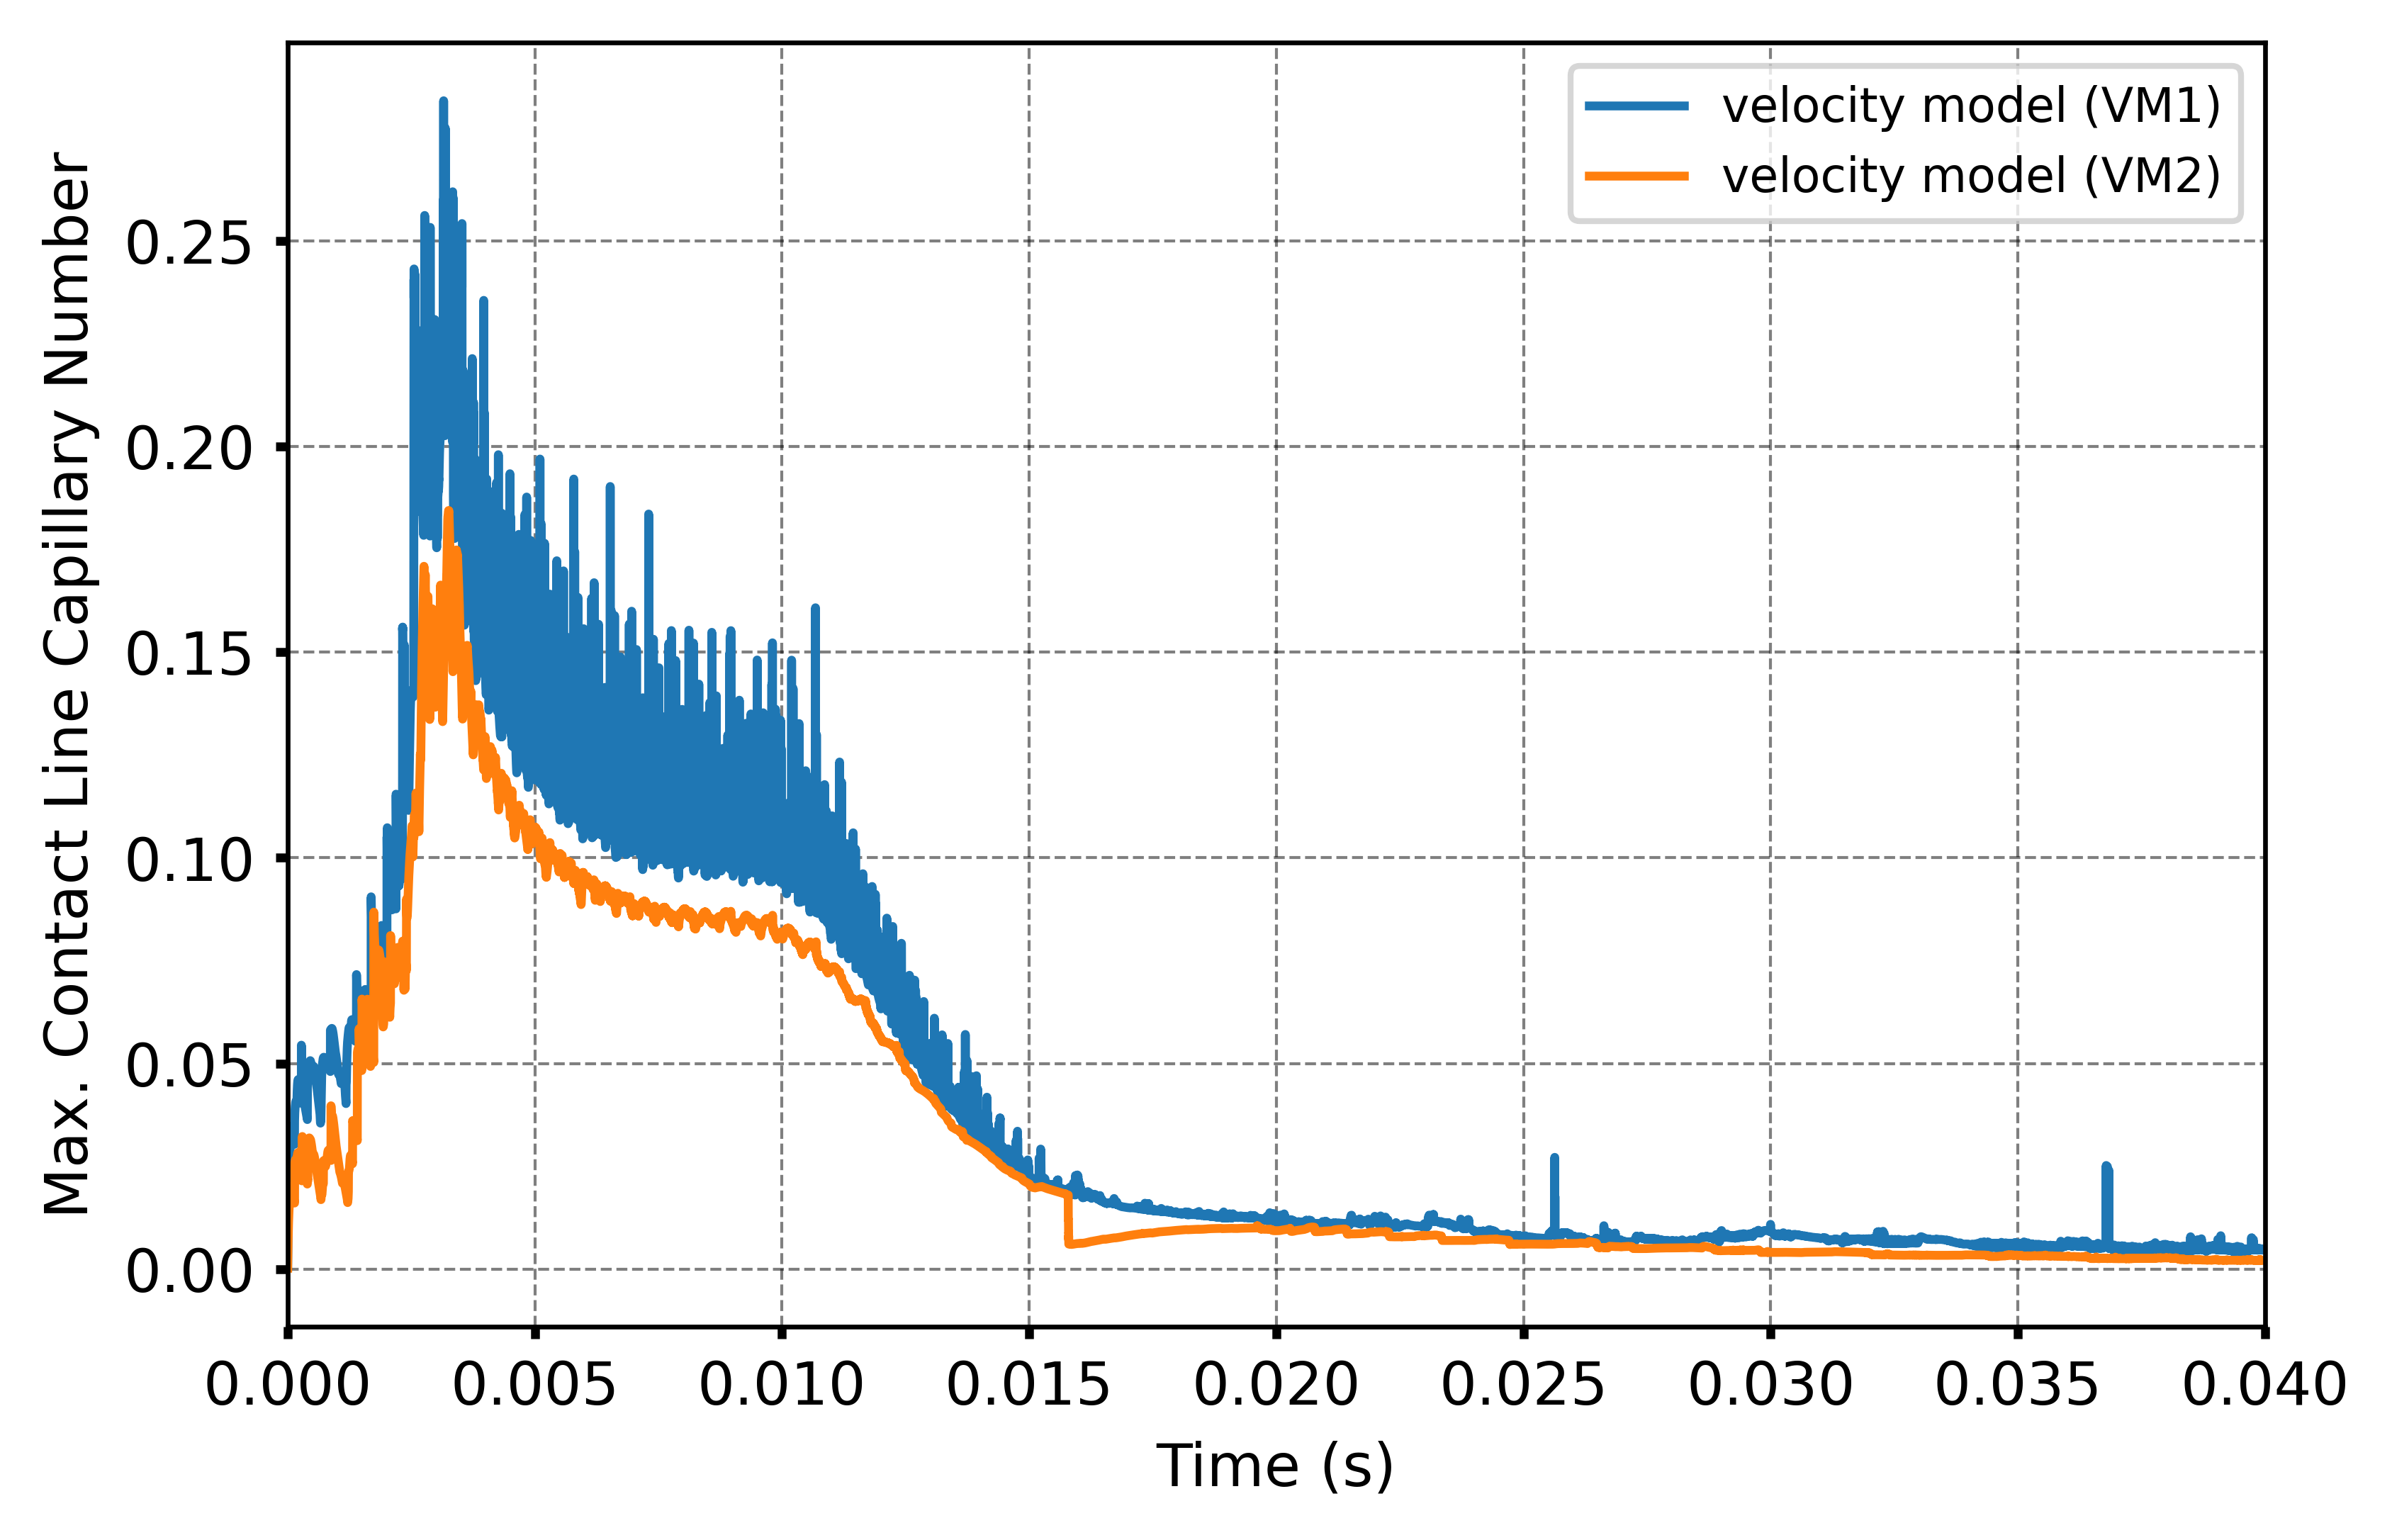

In [2]:
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.dpi"] = 600
fontSize = 10

label = [
    "velocity model (VM1)",
    "velocity model (VM2)"
]
def parse_log_file(file_path):
    # Dictionary to hold time and corresponding max capillary number
    time_capillary_dict = {}

    with open(file_path, 'r') as file:
        content = file.read()
    
    # Find all time step blocks
    time_step_blocks = content.split('Time = ')
    
    # Process each block, except the first which doesn't contain relevant data
    for block in time_step_blocks[1:]:
        # Extract time value
        time_match = re.search(r'^([\d\.eE+-]+)', block)
        if time_match:
            time = float(time_match.group(1))

            # Find all capillary numbers in this block
            capillary_numbers = re.findall(r'Max Contact Line Capilary number: ([\d\.eE+-]+)', block)

            # Get the last capillary number of the block
            if capillary_numbers:
                time_capillary_dict[time] = float(capillary_numbers[-1])

    return time_capillary_dict

def plot_capillary_numbers(log_files):
    #plt.figure(figsize=(12, 6))
    
    for idx, file_path in enumerate(log_files):
        # Parse each log file
        time_capillary_data = parse_log_file(file_path)
        # Sorting times and getting corresponding capillary numbers
        times = sorted(time_capillary_data.keys())
        capillary_numbers = [time_capillary_data[time] for time in times]
        
        # Plot each file's data
        plt.plot(times, capillary_numbers, linestyle='-', label=label[idx])  # using basename from path

    #plt.title('Max Contact Line Capillary Number vs Time Across Files')
    plt.xlabel('Time (s)')
    plt.ylabel('Max. Contact Line Capillary Number')
    plt.legend(fontsize=8, loc='upper right', ncol=1)
    plt.grid(visible=True, which='major', linestyle= 'dashed',color='black', alpha=0.5, lw=0.5)
    plt.tick_params(axis='both', direction='out', length=2, width=1.5,  grid_color='black', grid_alpha=0.5)
    plt.xticks(size = fontSize)
    plt.yticks(size = fontSize)
    plt.xlim([0, 0.04])
    plt.savefig('squalane-Ca-study'+'.pdf', bbox_inches='tight')
    plt.savefig('squalane-Ca-study'+'.png', bbox_inches='tight')
    plt.show()

cwd = os.getcwd()
log1= cwd + '/zetaStudy/DM1/log'
log2= cwd + '/zetaStudy/test_00000_case/log'
log_files = [log1, log2]

# Plot the results from all log files
plot_capillary_numbers(log_files)


# Contact angle models comparison
## CCA - Constant contact angle model
## DM1 - Cox-voinov dynamic contact angle model with $\theta_m = \theta_e$
## DM2 - Cox-voinov dynamic contact angle model with $\theta_m $ given by uncompensated-Young's stress term

['/home/asghar/ma11kuba/publications/article-2022-interIsoFoam-wetting-benchmark/rebuttal2/Reproducibility_badge/notebooks/PartialWettingDynamics/zetaStudy/CCA/postProcessing/wettedArea.csv', '/home/asghar/ma11kuba/publications/article-2022-interIsoFoam-wetting-benchmark/rebuttal2/Reproducibility_badge/notebooks/PartialWettingDynamics/zetaStudy/DM1/postProcessing/wettedArea.csv', '/home/asghar/ma11kuba/publications/article-2022-interIsoFoam-wetting-benchmark/rebuttal2/Reproducibility_badge/notebooks/PartialWettingDynamics/zetaStudy/test_00001_case/postProcessing/wettedArea.csv']


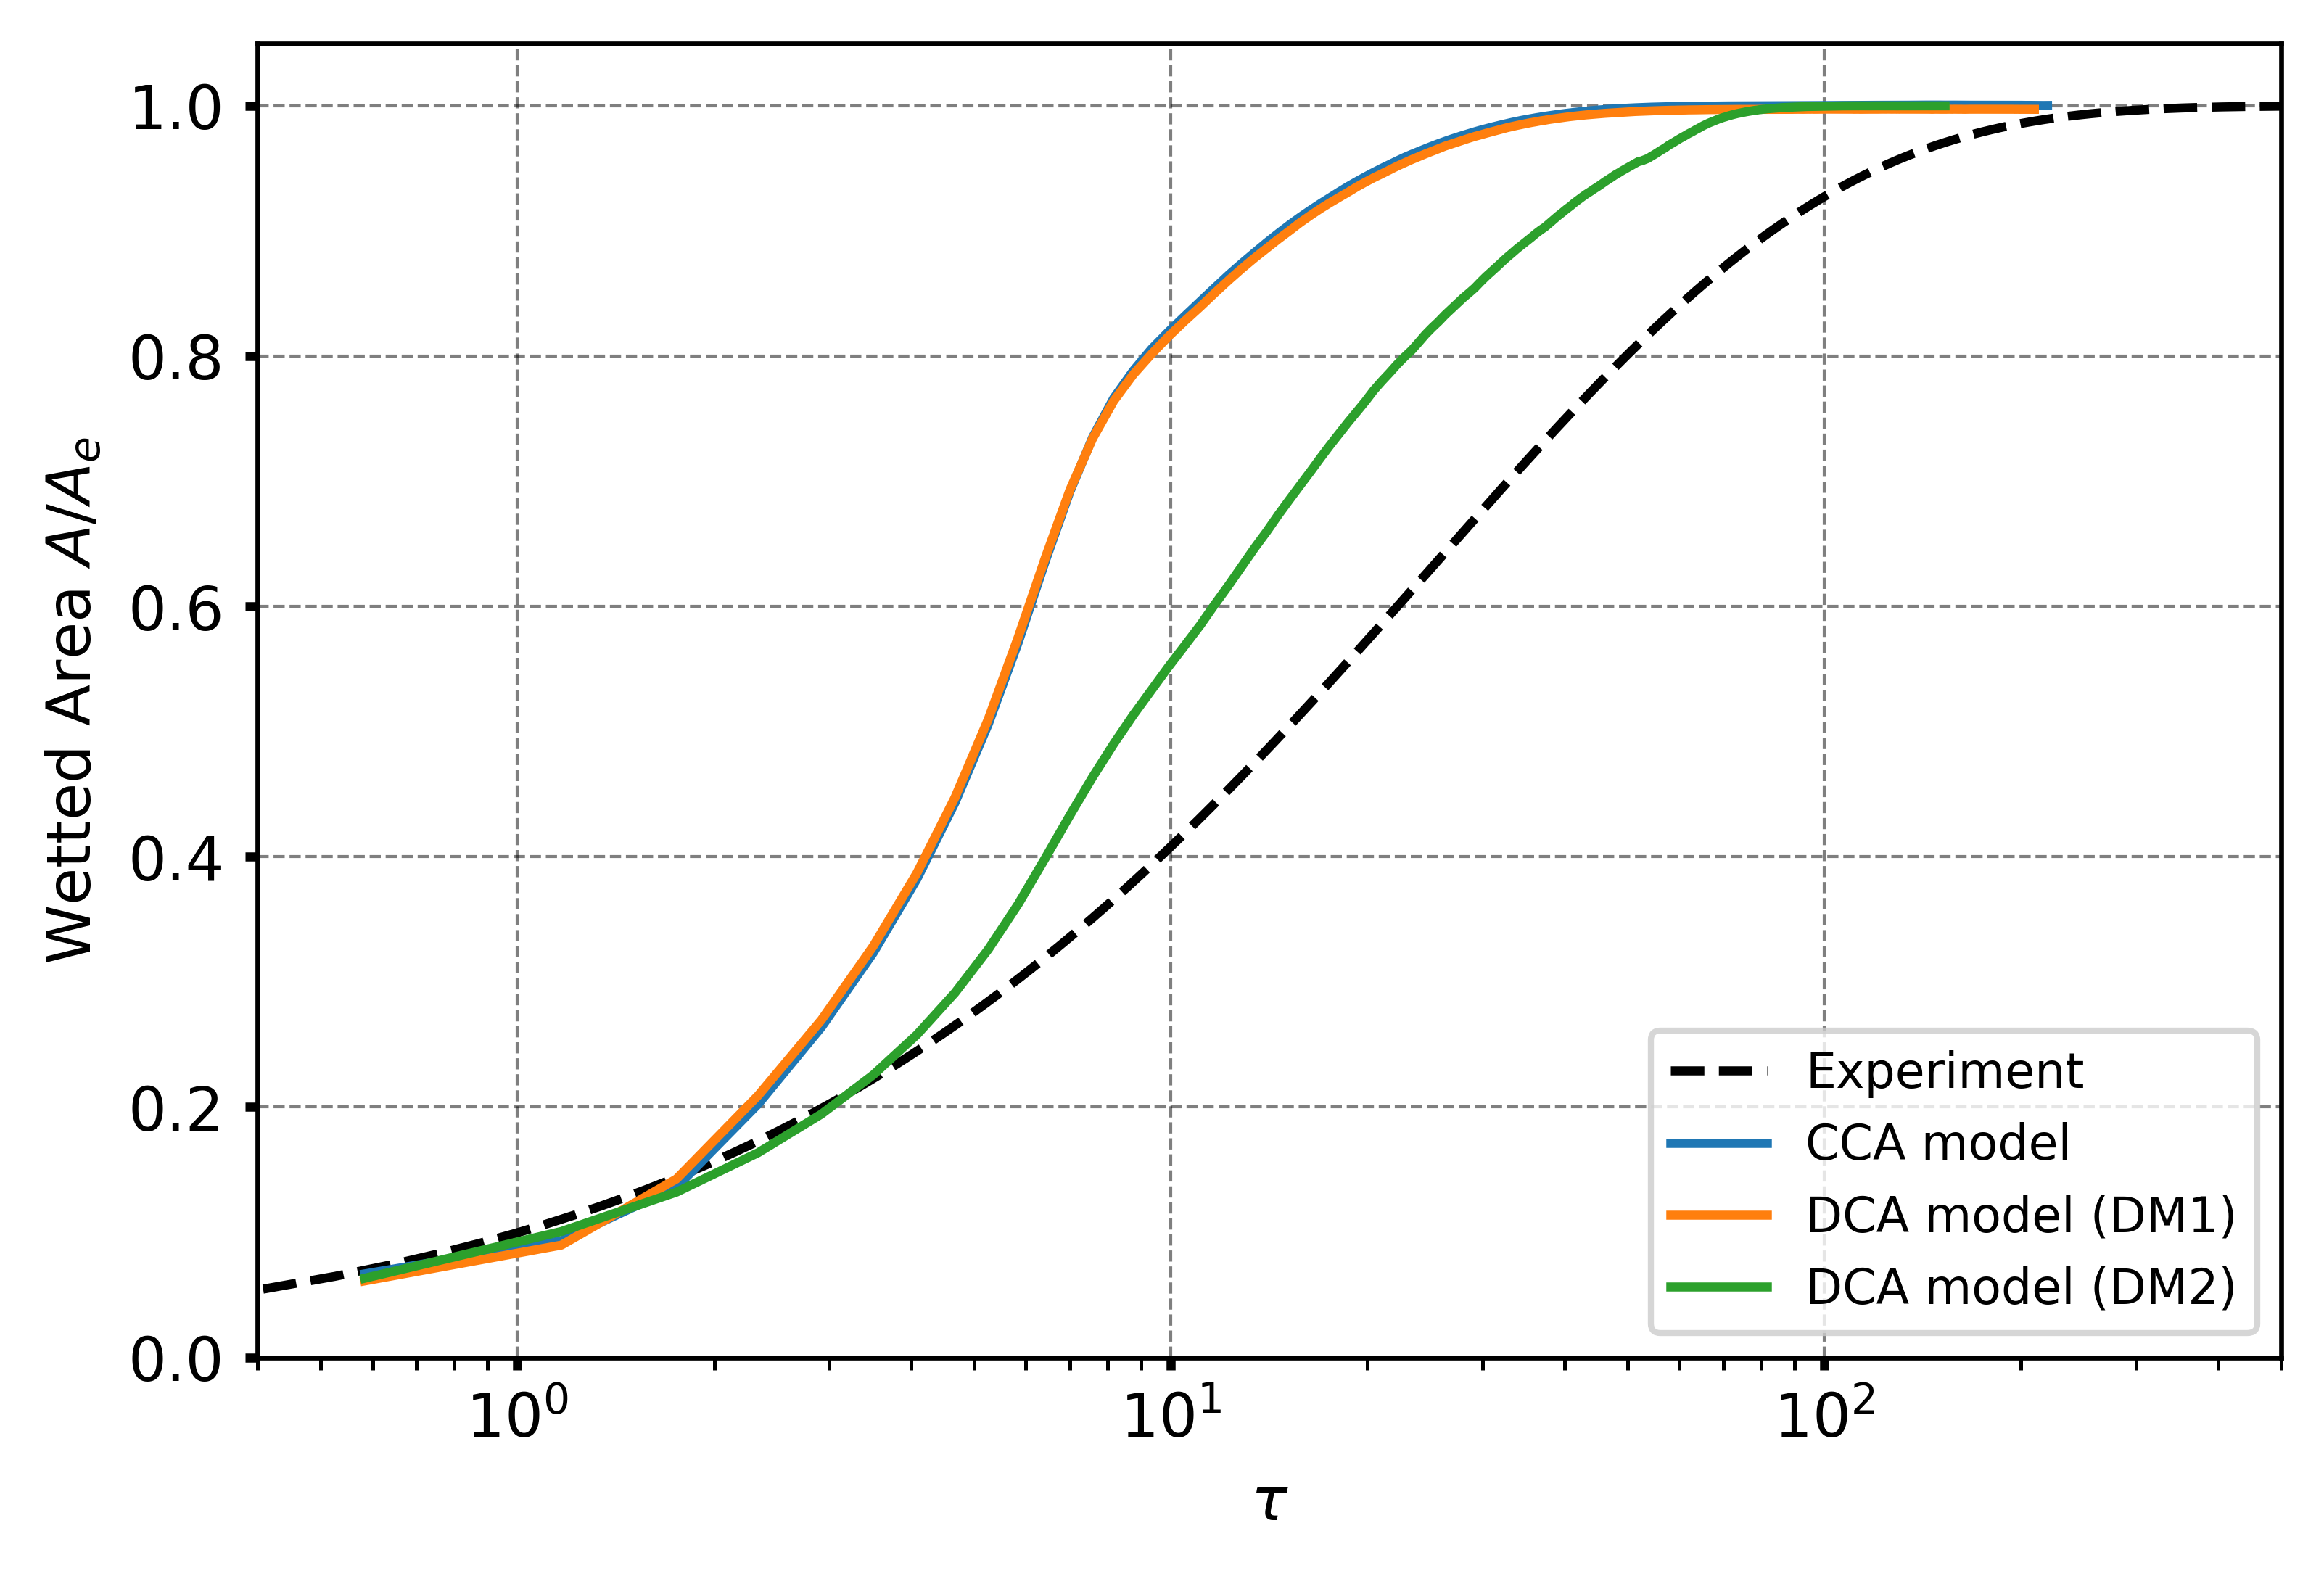

In [3]:
#Wetted Area 
#Loading the necessary files
import pandas as pd
import numpy as np
from vtk import vtkStructuredPointsReader
from vtk.util import numpy_support as VN
import csv
import sys
# for radians
import math
import os
import matplotlib.pyplot as plt
import re
import itertools
from matplotlib import rcParams
pi = np.pi
sin = np.sin
cos = np.cos
#Experimental parameters
# Given constants from Lavi and Marmur study for squalance drolet
K = 0.471
n = 0.699
R_0 = 1e-3  # droplet radius in meters
V2 = 4/3*np.pi*R_0**3
theta = math.radians(41)
#Liquid properties
sigma = 32e-3
mu = 34e-3
# Calculating the volume of the sphere
V = 4.1887902047863908955e-09 # given by volume fractions
factor = 4.49 # A_f/V^(2/3)
A_f = factor * V**(2/3) # Equilibrium wetted area from experiments

# Time range
t = np.linspace(0.0001, 1, 5000)
tau_0 = 0
# Calculating dimensionless tau for each time value
tau = (sigma * t) / (mu * V**(1/3)) +tau_0

#plt.figure(figsize=(4, 3))
rcParams["figure.dpi"] = 600
fontSize = 10

#Final wetted area
Af = 1.11242e-05

#######################################################################################
cwd = os.getcwd()
w1 = cwd + '/zetaStudy/CCA/postProcessing/wettedArea.csv'
w2 = cwd + '/zetaStudy/DM1/postProcessing/wettedArea.csv'
w3= cwd + '/zetaStudy/test_00001_case/postProcessing/wettedArea.csv'
wettedAreaFileNames =[w1,w2,w3]
print (wettedAreaFileNames)
plotLabels = ['CCA model','DCA model (DM1)','DCA model (DM2)']

# Experimental solution 
A_Ae = (1 - np.exp(-K * (tau**n) / (A_f / V2**(2/3)))) 
plt.plot(tau, A_Ae, label="Experiment",ls='dashed', linewidth=1.5, color='black')
# experimetnalCurve = "comparisonData/exp_curve.csv"
# df = pd.read_csv(experimetnalCurve, header=None)
# plt.plot(df.iloc[:, 0], df.iloc[:, 1], label='Experiment',ls='dashed', linewidth=1.5, color='black')

for idx, wettedAreaFile in enumerate(wettedAreaFileNames):
    pd.set_option('display.float_format', lambda x: '%.1f' % x)
    # Read the CSV file without headers
    df = pd.read_csv(wettedAreaFile, header=None)

    # Multiply the second column by 1e6
    df.iloc[:, 1] *= (1/Af) # normalizing the area
    #plt.xlim([0, 0.2])
    #plt.ylim([5.4, 6.2])
    t_x = (sigma * df.iloc[:, 0]) / (mu * V2**(1/3)) +tau_0
    plt.plot(t_x, df.iloc[:, 1], label=plotLabels[idx], linewidth=1.5)
    plt.grid(visible=True, which='major', linestyle= 'dashed',color='black', alpha=0.5, lw=0.5)
    plt.tick_params(axis='both', direction='out', length=2, width=1.5,  grid_color='black', grid_alpha=0.5)
    #plt.title(r'Mesh convergence study' +'\n'+str(fluid), fontsize=fontSize)
    plt.xlabel(r"$\tau$" ,color='black',fontsize=fontSize)
    plt.ylabel(r"Wetted Area $A/A_e$",color='black',fontsize=fontSize)
   # plt.legend(loc='lower center')
    plt.xticks(size = fontSize)
    plt.yticks(size = fontSize)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.xscale('log')
plt.xlim([0.4, 5e2])
plt.ylim([0, 1.05])
### Generate the plot
plt.legend(fontsize=8, loc='lower right', ncol=1)   
plt.savefig('squalane-models-study'+'.pdf', bbox_inches='tight')
plt.savefig('squalane-models-study'+'.png', bbox_inches='tight')
plt.show()



['/home/asghar/ma11kuba/publications/article-2022-interIsoFoam-wetting-benchmark/rebuttal2/Reproducibility_badge/notebooks/PartialWettingDynamics/zetaStudy/test_00000_case/postProcessing/wettedArea.csv', '/home/asghar/ma11kuba/publications/article-2022-interIsoFoam-wetting-benchmark/rebuttal2/Reproducibility_badge/notebooks/PartialWettingDynamics/zetaStudy/test_00001_case/postProcessing/wettedArea.csv', '/home/asghar/ma11kuba/publications/article-2022-interIsoFoam-wetting-benchmark/rebuttal2/Reproducibility_badge/notebooks/PartialWettingDynamics/zetaStudy/test_00002_case/postProcessing/wettedArea.csv', '/home/asghar/ma11kuba/publications/article-2022-interIsoFoam-wetting-benchmark/rebuttal2/Reproducibility_badge/notebooks/PartialWettingDynamics/zetaStudy/test_00003_case/postProcessing/wettedArea.csv', '/home/asghar/ma11kuba/publications/article-2022-interIsoFoam-wetting-benchmark/rebuttal2/Reproducibility_badge/notebooks/PartialWettingDynamics/zetaStudy/test_00004_case/postProcessing/w

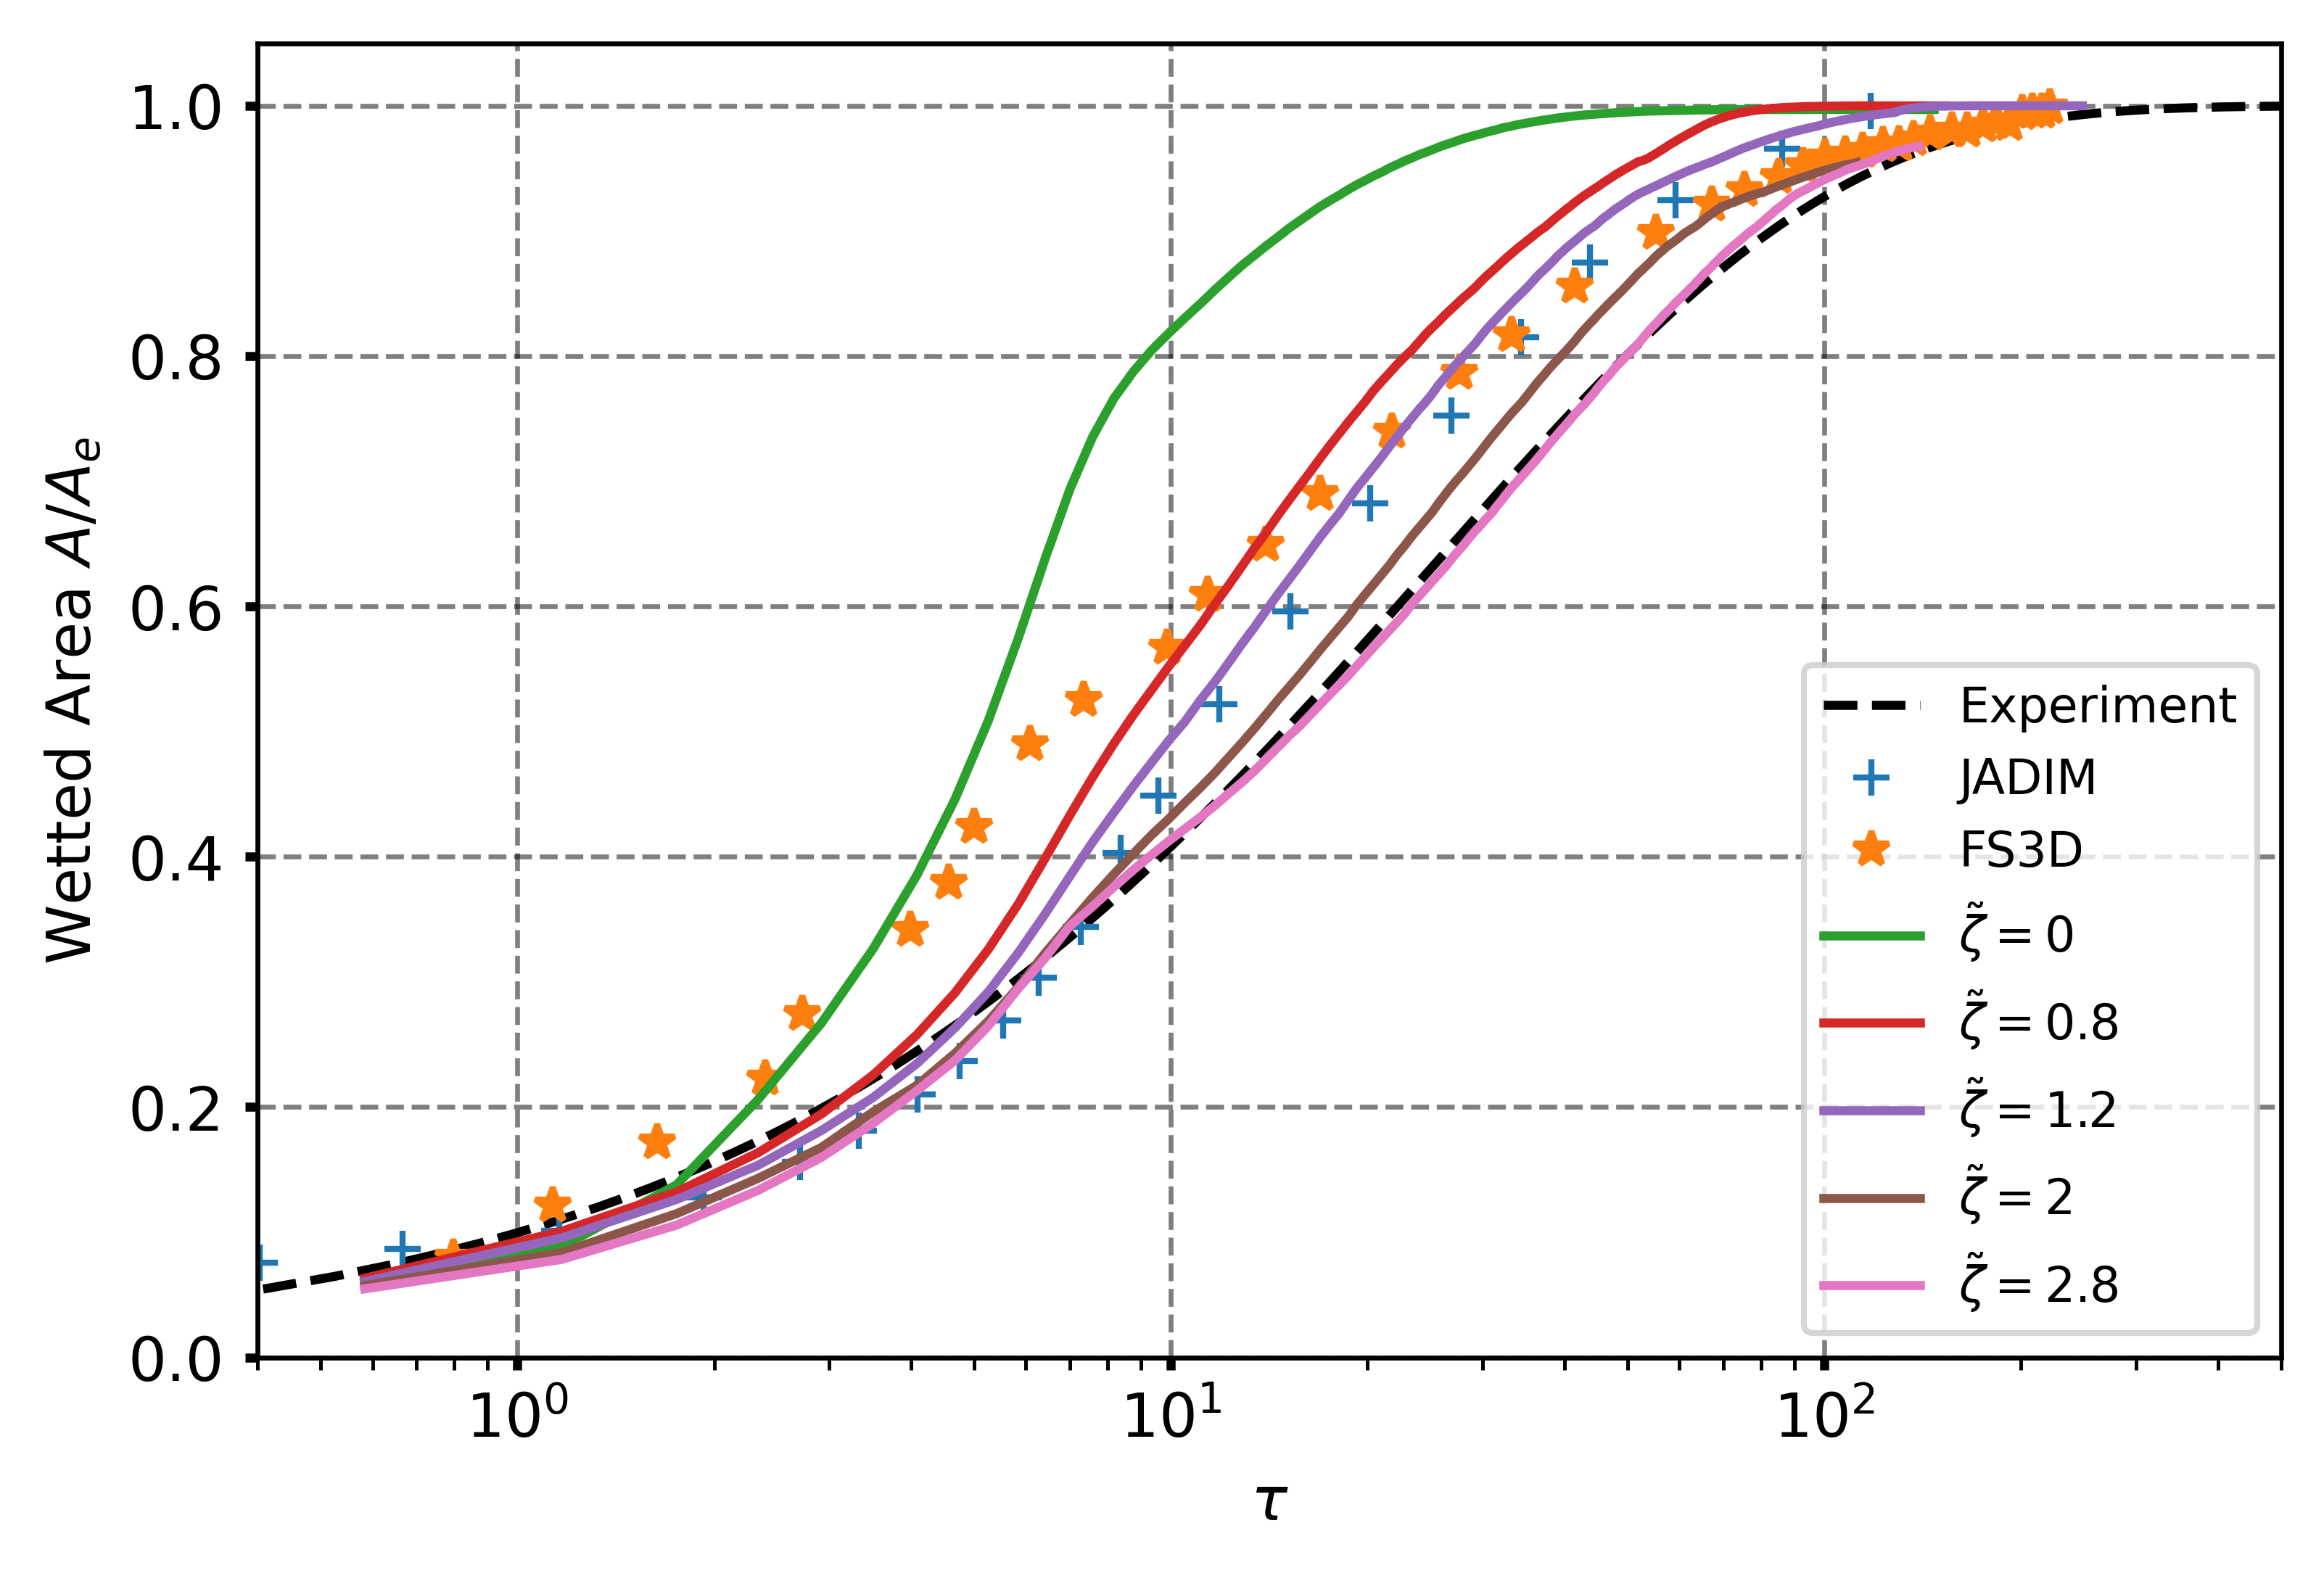

In [4]:
#Wetted Area 
#Loading the necessary files
import pandas as pd
import numpy as np
from vtk import vtkStructuredPointsReader
from vtk.util import numpy_support as VN
import csv
import sys
# for radians
import math
import os
import matplotlib.pyplot as plt
import re
import itertools
from matplotlib import rcParams
pi = np.pi
sin = np.sin
cos = np.cos

sys.path.append(os.path.join(os.getcwd(), '../modules'))

# Import the required functions from the "flat_spreading_funcs" module
from dynamics import Funcs
wettedAreaFileNames = Funcs.fileStructure('zetaStudy','wettedArea.csv', 'test_')
print (wettedAreaFileNames)
plotLabels = [r'$\tilde{\zeta}=0$',r'$\tilde{\zeta}=0.8$',r'$\tilde{\zeta}=1.2$',r'$\tilde{\zeta}=2$',r'$\tilde{\zeta}=2.8$']

#plt.figure(figsize=(4, 3))
rcParams["figure.dpi"] = 600
fontSize = 10

#Experimental parameters
# Given constants from Lavi and Marmur study for squalance drolet
K = 0.471
n = 0.699
R_0 = 1e-3  # droplet radius in meters
V2 = 4/3*np.pi*R_0**3
theta = math.radians(41)
#Liquid properties
sigma = 32e-3
mu = 34e-3
# Calculating the volume of the sphere
V = 4.1887902047863908955e-09 # given by volume fractions
factor = 4.49 # A_f/V^(2/3)
A_f = factor * V**(2/3) # Equilibrium wetted area from experiments

# Time range
t = np.linspace(0.0001, 1, 5000)
tau_0 = 0
# Calculating dimensionless tau for each time value
tau = (sigma * t) / (mu * V**(1/3)) +tau_0

# Final wetted area
Af = 1.11242e-05
# Experimental solution 
A_Ae = (1 - np.exp(-K * (tau**n) / (A_f / V2**(2/3)))) 
plt.plot(tau, A_Ae, label="Experiment",ls='dashed', linewidth=1.5, color='black')

# experimetnalCurve = "comparisonData/exp_curve.csv"
# df = pd.read_csv(experimetnalCurve, header=None)
# plt.plot(df.iloc[:, 0], df.iloc[:, 1], label='Experiment',ls='dashed', linewidth=1.5, color='black')
#######################################################################################

jadimCurve = "comparisonData/JADIM.csv"
df = pd.read_csv(jadimCurve, header=None)
#Initial wetted area
A0 = 7.03214e-07
jy = (df.iloc[:, 1] * (Af - A0)) + A0
plt.plot(df.iloc[:, 0], jy/Af, label='JADIM',marker='+',ls='none')
fs3dCurve = "comparisonData/FS3D.csv"
df = pd.read_csv(fs3dCurve, header=None)
plt.plot((sigma * df.iloc[:, 0]) / (mu * V2**(1/3)), df.iloc[:, 1], label='FS3D',marker='*',ls='none')

for idx, wettedAreaFile in enumerate(wettedAreaFileNames):
    pd.set_option('display.float_format', lambda x: '%.1f' % x)
    # Read the CSV file without headers
    df = pd.read_csv(wettedAreaFile, header=None)

    # Multiply the second column by 1e6
    df.iloc[:, 1] *= (1/Af) # normalizing the area
    #plt.xlim([0, 0.2])
    #plt.ylim([5.4, 6.2])
    t_x = (sigma * df.iloc[:, 0]) / (mu * V2**(1/3)) +tau_0
    plt.plot(t_x, df.iloc[:, 1], label=plotLabels[idx], linewidth=1.5)
    plt.grid(visible=True, which='major', linestyle= 'dashed',color='black')
    plt.tick_params(axis='both', direction='out', length=2, width=1.5,  grid_color='black', grid_alpha=0.5)
    #plt.title(r'Mesh convergence study' +'\n'+str(fluid), fontsize=fontSize)
    plt.xlabel(r"$\tau$" ,color='black',fontsize=fontSize)
    plt.ylabel(r"Wetted Area $A/A_e$",color='black',fontsize=fontSize)
   # plt.legend(loc='lower center')
    plt.xticks(size = fontSize)
    plt.yticks(size = fontSize)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.xscale('log')
plt.xlim([0.4, 5e2])
plt.ylim([0, 1.05])
### Generate the plot
plt.legend(fontsize=8, loc='lower right', ncol=1)   
plt.savefig('squalane-zeta-study'+'.pdf', bbox_inches='tight')
plt.savefig('squalane-zeta-study'+'.png', bbox_inches='tight')
plt.show()

